In [18]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def cal_delta(r, q, vol, d, u, T, S0):
    x1 = (math.log(d/S0) - (r-q-0.5*vol**2))*T / (vol*math.sqrt(T))
    x2 = (math.log(u/S0) - (r-q-0.5*vol**2))*T / (vol*math.sqrt(T))

    return math.exp(-r*T) * (1 / (S0*vol*math.sqrt(T))) * (norm.pdf(x1) - norm.pdf(x2))

In [56]:
def cal_vega(r, q, vol, d, u, T, S0):
    x1 = (math.log(d/S0) - (r-q-0.5*vol**2))*T / (vol*math.sqrt(T))
    x2 = (math.log(u/S0) - (r-q-0.5*vol**2))*T / (vol*math.sqrt(T))

    return math.exp(-r*T) * (math.sqrt(T) * (norm.pdf(x2) - norm.pdf(x1)) * (0.5 + (r-q)/vol**2) + 1/(vol**2*math.sqrt(T)) * (norm.pdf(x1) * math.log(d/S0) - norm.pdf(x2) * math.log(u/S0)))

In [57]:
S0s = range(1,250)

deltas = [cal_delta(0,0,0.2,80,120,1, S0) for S0 in S0s]
vegas = [cal_vega(0,0,0.2,80,120,1, S0) for S0 in S0s]

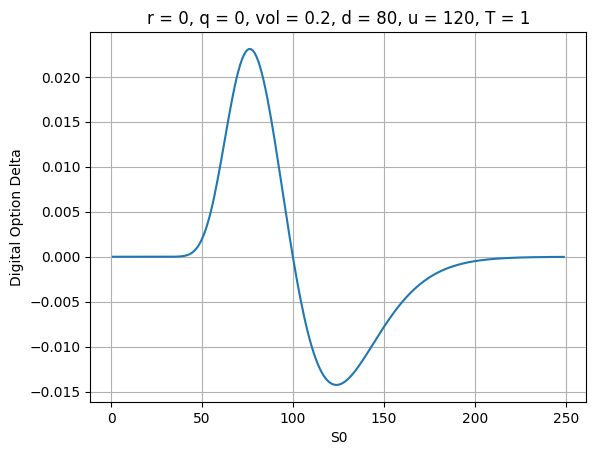

In [55]:
plt.grid(True)
plt.plot(S0s, deltas)

plt.title("r = 0, q = 0, vol = 0.2, d = 80, u = 120, T = 1")
plt.xlabel("S0")
plt.ylabel("Digital Option Delta")

plt.show()

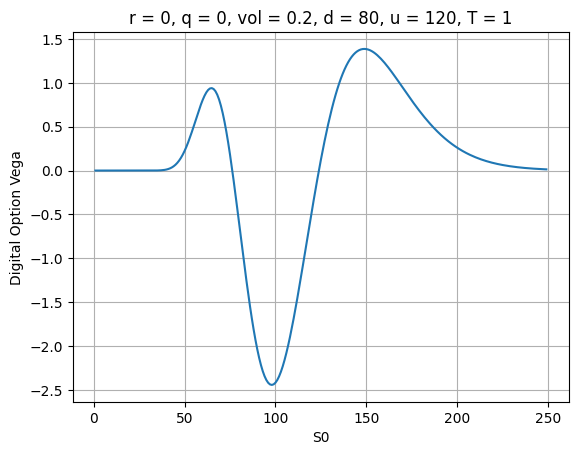

In [58]:
plt.grid(True)
plt.plot(S0s, vegas)

plt.title("r = 0, q = 0, vol = 0.2, d = 80, u = 120, T = 1")
plt.xlabel("S0")
plt.ylabel("Digital Option Vega")

plt.show()